In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from sklearn import metrics
%matplotlib inline

In [2]:
conn = sqlite3.connect("seckin_db.db")

In [3]:
cur = conn.cursor()

In [20]:
cur.execute("select * from entries limit 500")

In [21]:
results = cur.fetchall()

In [22]:
cur.execute('PRAGMA TABLE_INFO({})'.format('entries'))
names = [tup[1] for tup in cur.fetchall()]
print(names)

['time', 'duration', 'srcDevice', 'dstDevice', 'protocol', 'srcPort', 'dstPort', 'srcPackets', 'dstPackets', 'srcBytes', 'dstBytes']


In [23]:
# desired = names[7:]
# print(desired)

In [45]:

newList = []
for i in results:
#     print(i[7:])
    newList.append(i[7:])

print(newList)

[(1665, 1108, 300810, 250408), (1866, 0, 1477041, 0), (3326, 0, 2656305, 0), (5423, 0, 4388449, 0), (7061, 0, 5745536, 0), (8638, 0, 7052947, 0), (9943, 0, 8105139, 0), (11544, 0, 9398696, 0), (13011, 0, 10586412, 0), (14876, 0, 12128980, 0), (16366, 0, 13365368, 0), (18213, 0, 14897583, 0), (19467, 0, 15924693, 0), (20703, 0, 16920558, 0), (21922, 0, 17905913, 0), (23159, 0, 18931121, 0), (24344, 0, 19914020, 0), (25816, 0, 21135448, 0), (27333, 0, 22393722, 0), (28257, 0, 23149303, 0), (0, 387956, 0, 528637071), (2702, 3219, 226968, 296148), (5445, 6438, 457380, 592296), (9296, 11957, 780864, 1100044), (12773, 15636, 1072932, 1438512), (15801, 19775, 1327284, 1819300), (17015, 21155, 1429260, 1946260), (4504, 3544, 951517, 632127), (2673, 3219, 224532, 296148), (5307, 6438, 445788, 592296), (9031, 11033, 758604, 1015036), (12076, 15169, 1014384, 1395548), (5462, 4692, 1116322, 791041), (0, 625559, 0, 870655259), (0, 351743, 0, 476432504), (0, 634155, 0, 882924509), (2693, 3217, 22621

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(newList))

In [48]:
X_normalized.columns = ['srcPackets','dstPackets','srcBytes','dstBytes']

In [49]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_normalized)
y_kmeans = kmeans.predict(X_normalized)

In [51]:
centers = kmeans.cluster_centers_
print('Cluster centers of columns:\n')
print(pd.DataFrame(centers,columns= ['srcPackets','dstPackets','srcBytes','dstBytes']))

Cluster centers of columns:

   srcPackets  dstPackets  srcBytes  dstBytes
0    0.005165    0.001748  0.008387  0.005240
1    0.999883    0.999991  0.999874  0.999962


# Implementing Elbow Method

In [52]:
from sklearn import metrics
from scipy.spatial.distance import cdist

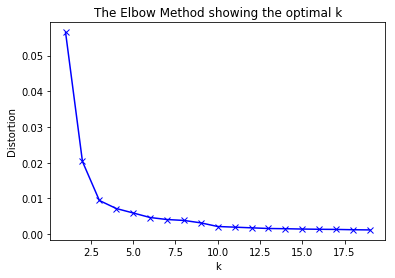

In [53]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_normalized)
    kmeanModel.fit(X_normalized)
    distortions.append(sum(np.min(cdist(X_normalized, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_normalized.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Average Solhouette Method

In [54]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [55]:
cluster_range = range( 2, 10 )

for n_clusters in cluster_range:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict( X_normalized )

  silhouette_avg = silhouette_score(X_normalized, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X_normalized, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.9854249300759831
For n_clusters = 3 The average silhouette_score is : 0.9582150834583992
For n_clusters = 4 The average silhouette_score is : 0.9566700733166021
For n_clusters = 5 The average silhouette_score is : 0.9450450109127277
For n_clusters = 6 The average silhouette_score is : 0.9230322455237308
For n_clusters = 7 The average silhouette_score is : 0.9264364145947288
For n_clusters = 8 The average silhouette_score is : 0.9270637250817274
For n_clusters = 9 The average silhouette_score is : 0.8828771913752693


# Mean-Shift Clustering

In [56]:
from sklearn.cluster import MeanShift, estimate_bandwidth

ms = MeanShift(bin_seeding=True)
ms.fit(X_normalized)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 12


# Gaussian Mixture Models

In [57]:
from sklearn.cluster import MeanShift, estimate_bandwidth

ms = MeanShift(bin_seeding=True)
ms.fit(X_normalized)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 12


# New Column

In [87]:
resultsCopy = []
for i in results:
    newList = []
    for j in i:
        newList.append(j)
    resultsCopy.append(newList)
    

In [94]:
labels = kmeans.labels_
# print(resultsCopy)
# print(labels)
j = 0
for i in resultsCopy:
    i.append(labels[j])
    j = j+1

print(resultsCopy)
    

[['118783', '6976', 'Comp450942', 'Comp829338', 6, 'Port03137', 445, 1665, 1108, 300810, 250408, 0], ['118785', '14178', 'IP564116', 'Comp141988', 17, 5060, 5060, 1866, 0, 1477041, 0, 0], ['118785', '28147', 'IP564116', 'Comp141988', 17, 5060, 5060, 3326, 0, 2656305, 0, 0], ['118785', '48507', 'IP564116', 'Comp141988', 17, 5060, 5060, 5423, 0, 4388449, 0, 0], ['118785', '63173', 'IP564116', 'Comp141988', 17, 5060, 5060, 7061, 0, 5745536, 0, 0], ['118785', '78594', 'IP564116', 'Comp141988', 17, 5060, 5060, 8638, 0, 7052947, 0, 0], ['118785', '90763', 'IP564116', 'Comp141988', 17, 5060, 5060, 9943, 0, 8105139, 0, 0], ['118785', '104427', 'IP564116', 'Comp141988', 17, 5060, 5060, 11544, 0, 9398696, 0, 0], ['118785', '115677', 'IP564116', 'Comp141988', 17, 5060, 5060, 13011, 0, 10586412, 0, 0], ['118785', '135078', 'IP564116', 'Comp141988', 17, 5060, 5060, 14876, 0, 12128980, 0, 0], ['118785', '148289', 'IP564116', 'Comp141988', 17, 5060, 5060, 16366, 0, 13365368, 0, 0], ['118785', '167723

In [97]:
print(resultsCopy[312])

['119169', '65450', 'Comp004479', 'Comp274690', 6, 'Port17617', 2049, 188026938, 1106033761, 18245057412, 45578036816, 1]


In [102]:
print("NEW TABLE! Kinda...")

print("['time', 'duration', 'srcDevice', 'dstDevice', 'protocol', 'srcPort', 'dstPort', 'srcPackets', 'dstPackets', 'srcBytes', 'dstBytes', cluster]")
for i in resultsCopy:
    print(i)

NEW TABLE! Kinda...
['time', 'duration', 'srcDevice', 'dstDevice', 'protocol', 'srcPort', 'dstPort', 'srcPackets', 'dstPackets', 'srcBytes', 'dstBytes', cluster]
['118783', '6976', 'Comp450942', 'Comp829338', 6, 'Port03137', 445, 1665, 1108, 300810, 250408, 0]
['118785', '14178', 'IP564116', 'Comp141988', 17, 5060, 5060, 1866, 0, 1477041, 0, 0]
['118785', '28147', 'IP564116', 'Comp141988', 17, 5060, 5060, 3326, 0, 2656305, 0, 0]
['118785', '48507', 'IP564116', 'Comp141988', 17, 5060, 5060, 5423, 0, 4388449, 0, 0]
['118785', '63173', 'IP564116', 'Comp141988', 17, 5060, 5060, 7061, 0, 5745536, 0, 0]
['118785', '78594', 'IP564116', 'Comp141988', 17, 5060, 5060, 8638, 0, 7052947, 0, 0]
['118785', '90763', 'IP564116', 'Comp141988', 17, 5060, 5060, 9943, 0, 8105139, 0, 0]
['118785', '104427', 'IP564116', 'Comp141988', 17, 5060, 5060, 11544, 0, 9398696, 0, 0]
['118785', '115677', 'IP564116', 'Comp141988', 17, 5060, 5060, 13011, 0, 10586412, 0, 0]
['118785', '135078', 'IP564116', 'Comp141988',

In [25]:
cur.close()

In [26]:
conn.close()